#14MBID - TFM

#Análisis de la influencia de los factores deportivos en la tipología y duración de las lesiones en La Liga.

### Jokin Atxa Galdos

## Carga de datos partidos

In [9]:
import pandas as pd

In [10]:
# Cargar el excel en un DataFrame de pandas
df_partidos = pd.read_csv("partidosJugados.csv")
print(df_partidos)

                                                  Jornada       Fecha Vacio1  \
0                                                 Jornada       Fecha  Local   
1                          Ronda de calificación - vuelta  25/08/2022    NaN   
2       Equipo: 0,\n                        XI inicial...         NaN    NaN   
3                                                 Jornada       Fecha  Local   
4                                                 Grupo B  10/01/2022    NaN   
...                                                   ...         ...    ...   
521706                                                  5  14/11/2018    NaN   
521707                                                  6  19/11/2018    NaN   
521708                                                  1  21/03/2019    NaN   
521709                                                  2  25/03/2019    NaN   
521710  Equipo: 4,\n                        XI inicial...         NaN    NaN   

               Local     Vacio2      Vi

Vamos a limpiar el df. Hay muchas filas que no son partidos, porque se han extraido las tablas al completo, y tenían más información que partidos. Además, lo importante son las fechas de los partidos, por lo que si alguna fila no tiene dato de fecha se va a borrar también.

In [11]:
df_partidos['Fecha'] = pd.to_datetime(df_partidos['Fecha'], format='%d/%m/%Y', errors='coerce')
df_partidos = df_partidos.dropna(subset=['Fecha'])

In [12]:
df_partidos.columns

Index(['Jornada', 'Fecha', 'Vacio1', 'Local', 'Vacio2', 'Visitante',
       'Resultado', 'Pos', 'Gol', 'Asistencia', 'Propia', 'Tarjeta Amarilla',
       'Doble amarilla', 'Roja', 'Entra', 'Sale', 'Minutos', 'NombreArchivo'],
      dtype='object')

In [13]:
eliminar = ['Vacio1', 'Local', 'Vacio2', 'Visitante', 'Resultado', 'Pos', 'Gol', 'Asistencia',
            'Propia', 'Tarjeta Amarilla','Doble amarilla','Roja']

In [14]:
df_partidos.drop(eliminar, inplace = True, axis = 1)

In [15]:
df_partidos.to_csv('df_partidos.csv', index=False)  # Si no quieres guardar el índice, usa index=False

<Axes: >

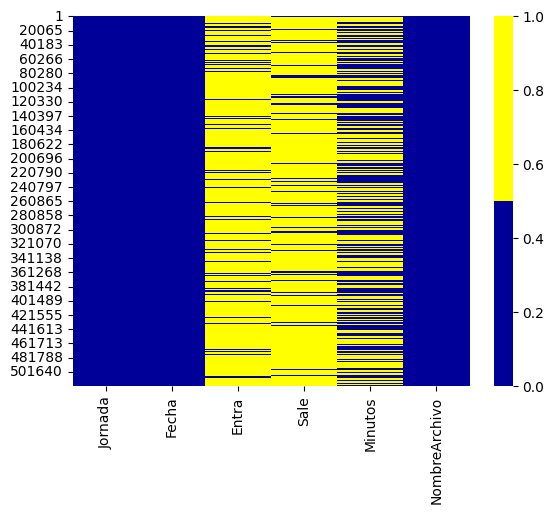

In [16]:
import seaborn as sns

# Ver cuantos datos estan vacios
cols = df_partidos.columns[:2000]
colours = ['#000099', '#ffff00'] # amarillo - null, azul - hay dato
sns.heatmap(df_partidos[cols].isnull(), cmap=sns.color_palette(colours))

Muchos datos de minutos están vacios, porque son los partidos en los que el jugador no ha jugado ni un minuto. Se va a poner 0 minutos.

In [17]:
df_partidos['Minutos'].fillna(0, inplace=True)

Vamos a reconvertir la ultima columna en 3: Nombre, Competicion y Año

In [18]:
import pandas as pd

# Dividir la columna del nombre en tres columnas separadas 'Nombre', 'Competicion', y 'Año'<
df_partidos[['Nombre', 'Competicion', 'Año']] = df_partidos['NombreArchivo'].str.split('_', expand=True)

# Mostrar el DataFrame resultante
print(df_partidos)


                               Jornada      Fecha Entra Sale Minutos  \
1       Ronda de calificación - vuelta 2022-08-25   NaN  NaN       0   
4                              Grupo B 2022-01-10   NaN  NaN       0   
5                              Grupo B 2022-01-14   NaN  NaN       0   
6                              Grupo B 2022-01-18   NaN  NaN       0   
7                              Octavos 2022-01-24   NaN  NaN       0   
...                                ...        ...   ...  ...     ...   
521703                Octavos - vuelta 2015-01-14   NaN  60'     60'   
521706                               5 2018-11-14   NaN  NaN       0   
521707                               6 2018-11-19   NaN  NaN     90'   
521708                               1 2019-03-21   NaN  NaN     90'   
521709                               2 2019-03-25   NaN  NaN       0   

                                            NombreArchivo            Nombre  \
1       Mamadou Mbacke_Clasificación UEFA Europa Confe..

In [19]:
eliminar = ['Entra', 'Sale', 'NombreArchivo', 'Año']
df_partidos.drop(eliminar, inplace = True, axis = 1)

In [20]:
df_partidos

,Jornada,Fecha,Minutos,Nombre,Competicion
1,Ronda de calificación - vuelta,2022-08-25,0,Mamadou Mbacke,Clasificación UEFA Europa Conference League
4,Grupo B,2022-01-10,0,Mouctar Diakhaby,Copa Africana de Naciones
5,Grupo B,2022-01-14,0,Mouctar Diakhaby,Copa Africana de Naciones
6,Grupo B,2022-01-18,0,Mouctar Diakhaby,Copa Africana de Naciones
7,Octavos,2022-01-24,0,Mouctar Diakhaby,Copa Africana de Naciones
...,...,...,...,...,...
521703,Octavos - vuelta,2015-01-14,60',Héctor Yuste,Copa del Rey
521706,5,2018-11-14,0,Unai Simón,Partidos amistosos
521707,6,2018-11-19,90',Unai Simón,Partidos amistosos
521708,1,2019-03-21,90',Unai Simón,Partidos amistosos


##Lesiones

In [21]:
# Cargar el excel en un DataFrame de pandas
df_lesiones = pd.read_excel("dataInjuryExplodedFiltrado.xlsx")
print(df_lesiones)

                            Injury        From          To           Teams  \
0            Lesión de pantorrilla  08/04/2015  14/05/2015  Rayo Vallecano   
1                 Rotura de fibras  08/01/2012  05/02/2012    RCD Espanyol   
2       Rotura del menisco externo  30/10/2021  30/12/2021     Hércules CF   
3               Menisco desgarrado  07/03/2021  07/08/2021     Hércules CF   
4     Rotura del ligamento cruzado  17/07/2011  01/02/2012       Girona FC   
...                            ...         ...         ...             ...   
6404          Problemas musculares  02/04/2018  01/05/2018    RCD Espanyol   
6405  Rotura del ligamento cruzado  19/03/2017  09/11/2017    RCD Espanyol   
6406             Lesión de tobillo  26/09/2016  18/11/2016    RCD Espanyol   
6407               Lesión de muslo  18/04/2016  02/05/2016    RCD Espanyol   
6408           Distensión de muslo  11/01/2016  11/02/2016    RCD Espanyol   

      NumberOfMatches            Player  
0                   7

Descargar los datos en excel de los equipos y jugadores, ya filtrados por equipos de La Liga.

<Axes: >

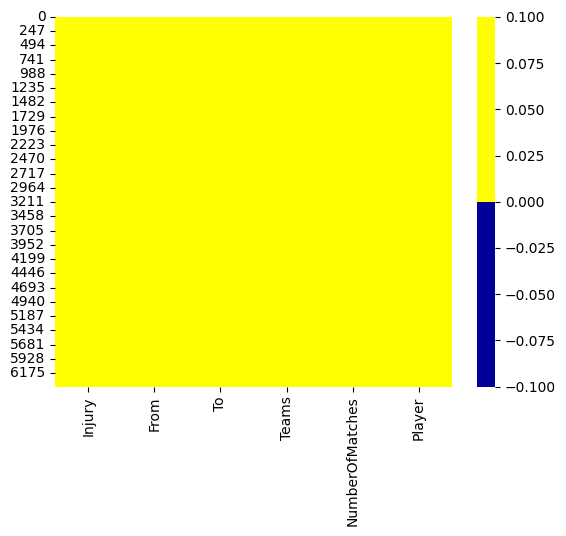

In [22]:
# Ver cuantos datos estan vacios
cols = df_lesiones.columns[:2000]
colours = ['#000099', '#ffff00'] # amarillo - null, azul - hay dato
sns.heatmap(df_lesiones[cols].isnull(), cmap=sns.color_palette(colours))

In [23]:
#Borramos algunos valores
borrar = ['01/02','02/03','03/04',
                '04/05','05/06','06/07',
                '07/08','08/09','09/10',
                '10/11','11/12','12/13',
                '13/14','14/15','15/16',
                '16/17','17/18','18/19',
                '19/20','20/21','21/22',
                '22/23','23/24']  # Agrega los reemplazos necesarios
#Reemplazamos algunos valores
replacements = {'-': '29/03/2024'}  # Agrega los reemplazos necesarios

# Aplica el reemplazo
df_lesiones['From'] = df_lesiones['From'].replace(replacements)
df_lesiones['To'] = df_lesiones['To'].replace(replacements)

#Borrar los que hay que borrar
df_lesiones = df_lesiones[~df_lesiones['From'].isin(borrar)]
df_lesiones = df_lesiones[~df_lesiones['To'].isin(borrar)]

In [24]:
df_lesiones['From'] = pd.to_datetime(df_lesiones['From'], format='%d/%m/%Y')
df_lesiones['To'] = pd.to_datetime(df_lesiones['To'], format='%d/%m/%Y')

In [25]:
print(df_lesiones)

                            Injury       From         To           Teams  \
0            Lesión de pantorrilla 2015-04-08 2015-05-14  Rayo Vallecano   
1                 Rotura de fibras 2012-01-08 2012-02-05    RCD Espanyol   
2       Rotura del menisco externo 2021-10-30 2021-12-30     Hércules CF   
3               Menisco desgarrado 2021-03-07 2021-08-07     Hércules CF   
4     Rotura del ligamento cruzado 2011-07-17 2012-02-01       Girona FC   
...                            ...        ...        ...             ...   
6404          Problemas musculares 2018-04-02 2018-05-01    RCD Espanyol   
6405  Rotura del ligamento cruzado 2017-03-19 2017-11-09    RCD Espanyol   
6406             Lesión de tobillo 2016-09-26 2016-11-18    RCD Espanyol   
6407               Lesión de muslo 2016-04-18 2016-05-02    RCD Espanyol   
6408           Distensión de muslo 2016-01-11 2016-02-11    RCD Espanyol   

      NumberOfMatches            Player  
0                   7  Cristian Álvarez  
1  

## Informacion de los jugadores

In [26]:
import pandas as pd
import seaborn as sns

In [27]:
# Cargar el excel en un DataFrame de pandas
df_jugadores = pd.read_excel("informacion_jugadores.xlsx")
print(df_jugadores)

                        Izena                           Nombre  \
0               Víctor Valdés            Víctor Valdés Arribas   
1                  Rubén Miño               Rubén Miño Peralta   
2               Oier Olazábal            Oier Olazábal Paredes   
3           José Manuel Pinto       José Manuel Pinto Colorado   
4                Gerard Piqué            Gerard Piqué Bernabéu   
...                       ...                              ...   
3148             Brian Ocampo     Brian Alexis Ocampo Ferreira   
3149               Awer Mabil                   Awer Bul Mabil   
3150  José Antonio de la Rosa  José Antonio de la Rosa Garrido   
3151          Francisco Mwepu                  29/02/2000 (24)   
3152               Etta Eyong   Karl Edouard Blaise Etta Eyong   

     Fecha de Nacimiento        Lugar de Nacimiento  Altura  \
0        14/01/1982 (42)  L’Hospitalet de Llobregat  1,83 m   
1        18/01/1989 (35)      Cornellà de Llobregat  1,91 m   
2        14/09/198

In [28]:
df_jugadores['Fecha de Nacimiento'] = df_jugadores['Fecha de Nacimiento'].str.split(' ').str[0]
df_jugadores['Fecha de Nacimiento'] = pd.to_datetime(df_jugadores['Fecha de Nacimiento'], format='%d/%m/%Y')

<Axes: >

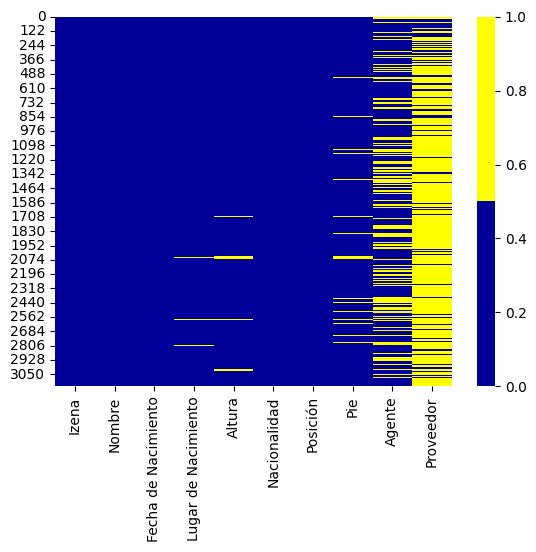

In [29]:
# Ver cuantos datos estan vacios
cols = df_jugadores.columns[:2000]
colours = ['#000099', '#ffff00'] # amarillo - null, azul - hay dato
sns.heatmap(df_jugadores[cols].isnull(), cmap=sns.color_palette(colours))

In [30]:
# Encuentra las filas duplicadas en la columna 'nombre'
duplicados = df_jugadores[df_jugadores.duplicated(subset='Izena', keep=False)]

# Muestra las filas duplicadas
print(duplicados)

               Izena                            Nombre Fecha de Nacimiento  \
62       Luis Suárez          Luis Alberto Suárez Díaz          1987-01-24   
168   Dani Rodríguez           Daniel Rodríguez Crespo          2005-08-09   
199             Kaká  Ricardo Izecson dos Santos Leite          1982-04-22   
219      Diego López             Diego López Rodríguez          1981-11-03   
305   Sergio Arribas              Sergio Arribas Calvo          2001-09-30   
...              ...                               ...                 ...   
2955     Manu García              Manuel García Alonso          1998-01-02   
2969      Javi López             Javier López Carballo          2002-03-25   
3015  Sergio Arribas           Sergio Arribas Blázquez          1995-07-07   
3036       Ivi López              Iván López Cristóbal          1998-08-08   
3142   Carlos García         Carlos García-Die Sánchez          2000-07-07   

         Lugar de Nacimiento  Altura    Nacionalidad  \
62     

Vamos a eliminar estos datos, ya que en un analisis general no importa tanto perder tan pocos datos. Se va a hacer lo mismo con el df de las lesiones, para no tener en cuenta esa informacion, porque puede haber conclusiones equivocadas.

In [31]:
# Eliminar jugadores duplicados de df_izena
df_jugadores = df_jugadores.drop_duplicates(subset='Izena', keep=False)

# Filtrar df_lesiones para eliminar las filas correspondientes a los jugadores duplicados
df_lesiones = df_lesiones[~df_lesiones['Player'].isin(df_jugadores[df_jugadores.duplicated(subset='Izena', keep=False)]['Izena'])]


## Jugadores que hayan jugado cada año.

In [32]:
# Cargar el archivo .txt en un DataFrame
df_JugadoresAño = pd.read_csv('JugadoresAño.txt', delimiter='_')

# Ver el DataFrame cargado
print(df_JugadoresAño)

                Jugador   Año
0         Víctor Valdés  2010
1            Rubén Miño  2010
2         Oier Olazábal  2010
3     José Manuel Pinto  2010
4          Gerard Piqué  2010
...                 ...   ...
8851     Álvaro Negredo  2022
8852        Lucas Pérez  2022
8853     Álvaro Giménez  2022
8854    Francisco Mwepu  2022
8855         Etta Eyong  2022

[8856 rows x 2 columns]


Combinamos con la informacion de los jugadores, para calcular las edades de cada uno.

In [33]:
df_JugadoresAñoInfo = pd.merge(df_JugadoresAño, df_jugadores, left_on='Jugador', right_on='Izena')
print(df_JugadoresAñoInfo)

                      Jugador   Año                    Izena  \
0               Víctor Valdés  2010            Víctor Valdés   
1               Víctor Valdés  2011            Víctor Valdés   
2               Víctor Valdés  2012            Víctor Valdés   
3               Víctor Valdés  2013            Víctor Valdés   
4                  Rubén Miño  2010               Rubén Miño   
...                       ...   ...                      ...   
8491             Brian Ocampo  2022             Brian Ocampo   
8492               Awer Mabil  2022               Awer Mabil   
8493  José Antonio de la Rosa  2022  José Antonio de la Rosa   
8494          Francisco Mwepu  2022          Francisco Mwepu   
8495               Etta Eyong  2022               Etta Eyong   

                               Nombre Fecha de Nacimiento  \
0               Víctor Valdés Arribas          1982-01-14   
1               Víctor Valdés Arribas          1982-01-14   
2               Víctor Valdés Arribas          1

In [34]:
# Convertir las cadenas de fecha en objetos de fecha
df_JugadoresAñoInfo['Fecha de Nacimiento'] = pd.to_datetime(df_JugadoresAñoInfo['Fecha de Nacimiento'], format='%d/%m/%Y')

# Calcular la edad en el año especificado en la columna 'Año'
df_JugadoresAñoInfo['Edad'] = df_JugadoresAñoInfo.apply(lambda row: row['Año'] - row['Fecha de Nacimiento'].year, axis=1)

# Ver el DataFrame resultante
print(df_JugadoresAñoInfo)


                      Jugador   Año                    Izena  \
0               Víctor Valdés  2010            Víctor Valdés   
1               Víctor Valdés  2011            Víctor Valdés   
2               Víctor Valdés  2012            Víctor Valdés   
3               Víctor Valdés  2013            Víctor Valdés   
4                  Rubén Miño  2010               Rubén Miño   
...                       ...   ...                      ...   
8491             Brian Ocampo  2022             Brian Ocampo   
8492               Awer Mabil  2022               Awer Mabil   
8493  José Antonio de la Rosa  2022  José Antonio de la Rosa   
8494          Francisco Mwepu  2022          Francisco Mwepu   
8495               Etta Eyong  2022               Etta Eyong   

                               Nombre Fecha de Nacimiento  \
0               Víctor Valdés Arribas          1982-01-14   
1               Víctor Valdés Arribas          1982-01-14   
2               Víctor Valdés Arribas          1

Ahora ya tenemos la informacion de cada jugador en cada año que han jugado, esto nos puede servir para sacar las conclusiones de lesiones por edad, ya que seguramente habra más lesionados de jente joven porque hay más jente joven. Hay que "normalizar" ese dato.

## Combinar lesiones y altura del jugador

In [35]:
df_LesionesJugadores = pd.merge(df_lesiones, df_jugadores, left_on='Player', right_on='Izena')
print(df_LesionesJugadores)

                            Injury       From         To           Teams  \
0            Lesión de pantorrilla 2015-04-08 2015-05-14  Rayo Vallecano   
1                 Rotura de fibras 2012-01-08 2012-02-05    RCD Espanyol   
2       Rotura del menisco externo 2021-10-30 2021-12-30     Hércules CF   
3               Menisco desgarrado 2021-03-07 2021-08-07     Hércules CF   
4     Rotura del ligamento cruzado 2011-07-17 2012-02-01       Girona FC   
...                            ...        ...        ...             ...   
5678          Problemas musculares 2018-04-02 2018-05-01    RCD Espanyol   
5679  Rotura del ligamento cruzado 2017-03-19 2017-11-09    RCD Espanyol   
5680             Lesión de tobillo 2016-09-26 2016-11-18    RCD Espanyol   
5681               Lesión de muslo 2016-04-18 2016-05-02    RCD Espanyol   
5682           Distensión de muslo 2016-01-11 2016-02-11    RCD Espanyol   

      NumberOfMatches            Player             Izena  \
0                   7  Cri

Convertimos las columnas de fechas en fechas, para poder calcular la edad de la lesion.

In [36]:
# Calcular la diferencia entre la fecha de referencia y la fecha de nacimiento
df_LesionesJugadores['Edad'] = (df_LesionesJugadores['From'] - df_LesionesJugadores['Fecha de Nacimiento']).dt.days // 365

## Datos FIFA

In [37]:
import pandas as pd

# Carga la hoja del archivo Excel en un DataFrame
df_FIFA15 = pd.read_excel('datos_FIFA.xlsx', sheet_name='FIFA 15')


In [38]:
# Filtrar las filas que estén dentro del rango de fechas deseado
df_lesiones_2015 = df_lesiones[(df_lesiones['From'] >= '01/08/2015') & (df_lesiones['From'] <= '30/07/2016')]

# Muestra el nuevo DataFrame resultante
print(df_lesiones_2015)

                     Injury       From         To           Teams  \
0     Lesión de pantorrilla 2015-04-08 2015-05-14  Rayo Vallecano   
29     Problemas musculares 2016-04-18 2016-04-22   Villarreal CF   
32          Lesión muscular 2015-12-03 2015-12-09     Valencia CF   
40          Lesión de muslo 2015-03-17 2015-06-01       Getafe CF   
72    Estiramiento de banda 2016-04-12 2016-04-24   Villarreal CF   
...                     ...        ...        ...             ...   
6383      Lesión de espalda 2015-08-10 2015-10-10    RCD Espanyol   
6391        Lesión de muslo 2015-04-19 2015-05-08   Villarreal CF   
6392        Lesión muscular 2015-03-08 2015-03-14   Villarreal CF   
6407        Lesión de muslo 2016-04-18 2016-05-02    RCD Espanyol   
6408    Distensión de muslo 2016-01-11 2016-02-11    RCD Espanyol   

      NumberOfMatches              Player  
0                   7    Cristian Álvarez  
29                  1     Roberto Soldado  
32                  2         Lucas Orb

<ipython-input-38-df4f0b4b2ea5>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_lesiones_2015 = df_lesiones[(df_lesiones['From'] >= '01/08/2015') & (df_lesiones['From'] <= '30/07/2016')]


Para juntar las lesiones con las estadisticas de FIFA, se necesita primero juntar con la informacion de los jugadores, porque no existe una union directa.

In [39]:
df_jugadoresFIFA15 = pd.merge(df_FIFA15, df_jugadores, left_on='long_name', right_on='Nombre')
df_lesionesFIFA15 = pd.merge(df_lesiones_2015, df_jugadoresFIFA15[['overall', 'pace', 'physic','Izena']], left_on='Player', right_on='Izena')
print(df_lesionesFIFA15)

                    Injury       From         To                      Teams  \
0    Lesión de pantorrilla 2015-04-08 2015-05-14             Rayo Vallecano   
1     Problemas musculares 2016-04-18 2016-04-22              Villarreal CF   
2          Lesión muscular 2015-12-03 2015-12-09                Valencia CF   
3          Lesión de muslo 2015-03-17 2015-06-01                  Getafe CF   
4    Estiramiento de banda 2016-04-12 2016-04-24              Villarreal CF   
..                     ...        ...        ...                        ...   
352       Fractura de dedo 2015-11-15 2016-02-11  RC Deportivo de La Coruña   
353        Lesión muscular 2015-11-05 2015-11-16                  Málaga CF   
354              Infección 2015-10-19 2015-10-26                  Málaga CF   
355     Lesión desconocida 2015-02-25 2015-03-09                  Málaga CF   
356      Lesión de espalda 2015-08-10 2015-10-10               RCD Espanyol   

     NumberOfMatches             Player  overall  p

<Axes: >

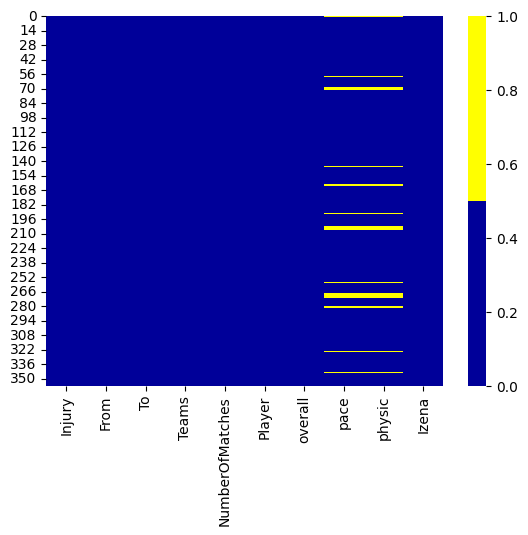

In [40]:
# Ver cuantos datos estan vacios
cols = df_lesionesFIFA15.columns[:2000]
colours = ['#000099', '#ffff00'] # amarillo - null, azul - hay dato
sns.heatmap(df_lesionesFIFA15[cols].isnull(), cmap=sns.color_palette(colours))

Rellenamos los vacios

In [41]:
# Calcula la media de cada columna
media_por_columna = df_lesionesFIFA15.mean()

# Rellena los valores faltantes con la media de cada columna
df_lesionesFIFA15 = df_lesionesFIFA15.fillna(media_por_columna)

# Verifica que se hayan rellenado los valores faltantes
print(df_lesionesFIFA15.isnull().sum())

Injury             0
From               0
To                 0
Teams              0
NumberOfMatches    0
Player             0
overall            0
pace               0
physic             0
Izena              0
dtype: int64


<ipython-input-41-cb5c88da2766>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  media_por_columna = df_lesionesFIFA15.mean()
<ipython-input-41-cb5c88da2766>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_por_columna = df_lesionesFIFA15.mean()


## Analisis

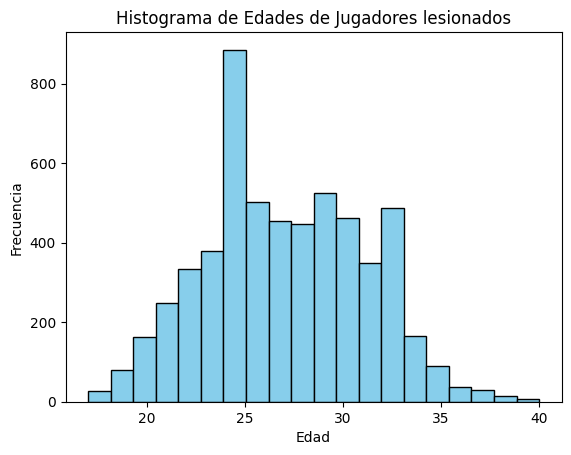

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Histograma usando hist() de Pandas
df_LesionesJugadores[['Edad']].hist(bins=20, color='skyblue', edgecolor='black')

# Personalizando el gráfico
plt.title('Histograma de Edades de Jugadores lesionados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

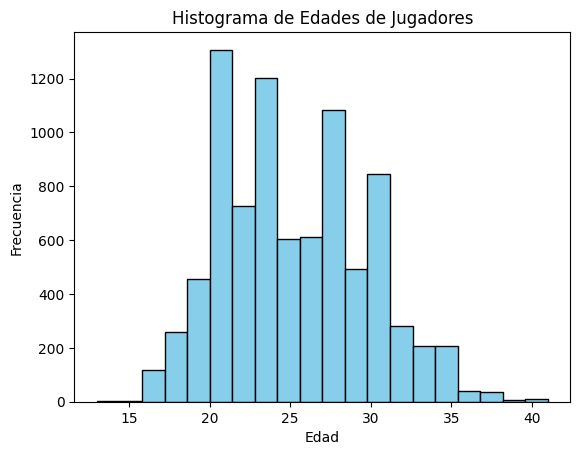

In [43]:
# Histograma usando hist() de Pandas
df_JugadoresAñoInfo[['Edad']].hist(bins=20, color='skyblue', edgecolor='black')

# Personalizando el gráfico
plt.title('Histograma de Edades de Jugadores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

Como se puede ver el histograma de la cantidad de las lesiones es casi igual al histograma de las edades de los jugadores. Hay que normalizar este histograma.

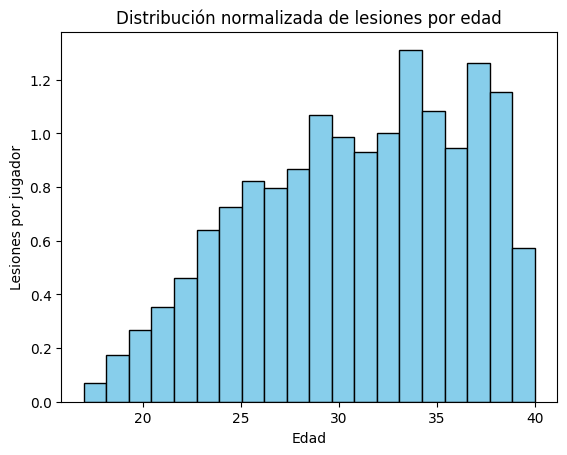

In [44]:
# Calcula el histograma de lesiones y el histograma de la cantidad de jugadores por edades
hist_lesiones, bins_lesiones = np.histogram(df_LesionesJugadores['Edad'], bins=20)
hist_jugadores, bins_jugadores = np.histogram(df_JugadoresAñoInfo['Edad'], bins=bins_lesiones)

# Normaliza el histograma de lesiones dividiendo el número de lesiones en cada grupo de edad por el número de jugadores en ese mismo grupo de edad
hist_lesiones_normalizado = hist_lesiones / hist_jugadores.astype(float)

# Grafica el histograma normalizado
plt.bar(bins_lesiones[:-1], hist_lesiones_normalizado, width=np.diff(bins_lesiones), align='edge',color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Lesiones por jugador')
plt.title('Distribución normalizada de lesiones por edad')
plt.show()


En esta nueva gráfica se ve muy claro que cuanto mayor es el jugador más probabilidad de lesión hay.

Haremos lo mismo con los atributos de pie bueno, posicion...

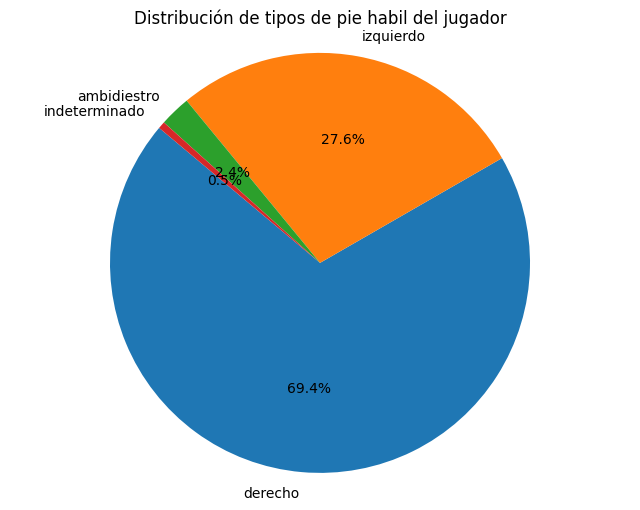

In [45]:
# Contamos cada tipo de "Pie"
conteo_pies = df_LesionesJugadores['Pie'].value_counts()

# Obtener los nombres de los diferentes tipos de 'Pie' y sus respectivos conteos
nombres_pies = conteo_pies.index.tolist()
conteos = conteo_pies.tolist()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.pie(conteos, labels=nombres_pies, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Distribución de tipos de pie habil del jugador')

# Mostrar el gráfico
plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()


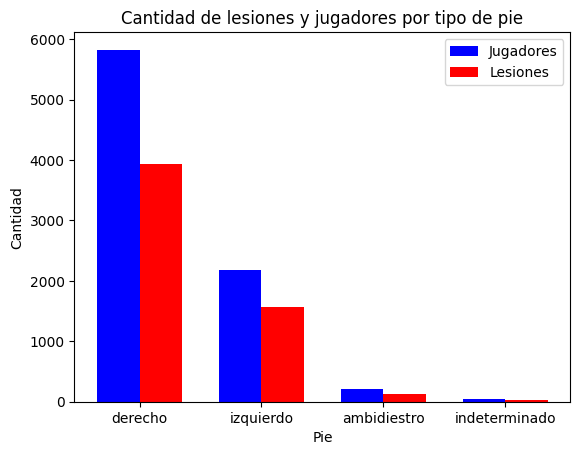

In [46]:
# Contar la cantidad de lesiones por tipo de pie
lesiones_por_pie = df_LesionesJugadores['Pie'].value_counts()

# Contar la cantidad de jugadores por tipo de pie
jugadores_por_pie = df_JugadoresAñoInfo['Pie'].value_counts()

# Unir índices y llenar valores faltantes con cero
index = lesiones_por_pie.index.union(jugadores_por_pie.index)
lesiones_por_pie = lesiones_por_pie.reindex(index, fill_value=0)
jugadores_por_pie = jugadores_por_pie.reindex(index, fill_value=0)

# Ancho de las barras
bar_width = 0.35

# Ajuste de posición para las barras de jugadores y lesiones
index_sorted_pos = np.arange(len(index))

# Graficar la cantidad de jugadores por tipo de pie
plt.bar(index_sorted_pos - bar_width/2, jugadores_por_pie, label='Jugadores', color='blue', width=bar_width)
# Graficar la cantidad de lesiones por tipo de pie
plt.bar(index_sorted_pos + bar_width/2, lesiones_por_pie, label='Lesiones', color='red', width=bar_width)

plt.xlabel('Pie')
plt.ylabel('Cantidad')
plt.title('Cantidad de lesiones y jugadores por tipo de pie')
plt.xticks(index_sorted_pos, index)
plt.legend()
plt.show()


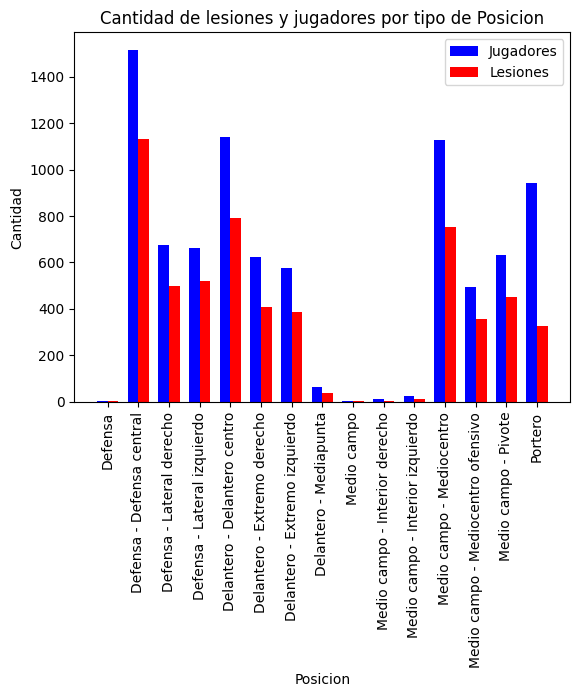

In [47]:
# Contar la cantidad de lesiones por tipo de Posicion
lesiones_por_Posicion = df_LesionesJugadores['Posición'].value_counts()
categorias = lesiones_por_Posicion.index

# Contar la cantidad de jugadores por tipo de Posicion
jugadores_por_Posicion = df_JugadoresAñoInfo['Posición'].value_counts()

# Unir índices y llenar valores faltantes con cero
index = lesiones_por_Posicion.index.union(jugadores_por_Posicion.index)
lesiones_por_Posicion = lesiones_por_Posicion.reindex(index, fill_value=0)
jugadores_por_Posicion = jugadores_por_Posicion.reindex(index, fill_value=0)

# Ancho de las barras
bar_width = 0.35

# Ajuste de posición para las barras de jugadores y lesiones
index_sorted_pos = np.arange(len(index))

# Graficar la cantidad de jugadores por tipo de Posicion
plt.bar(index_sorted_pos - bar_width/2, jugadores_por_Posicion, label='Jugadores', color='blue', width=bar_width)
# Graficar la cantidad de lesiones por tipo de Posicion
plt.bar(index_sorted_pos + bar_width/2, lesiones_por_Posicion, label='Lesiones', color='red', width=bar_width)

plt.xlabel('Posicion')
plt.ylabel('Cantidad')
plt.title('Cantidad de lesiones y jugadores por tipo de Posicion')
plt.xticks(index_sorted_pos, index, rotation=90)
plt.legend()
plt.show()

Una de las cosas a comentar de esta última gráfica es que se ve que la posición de portero es la que en promedio menos lesiones suele tener.

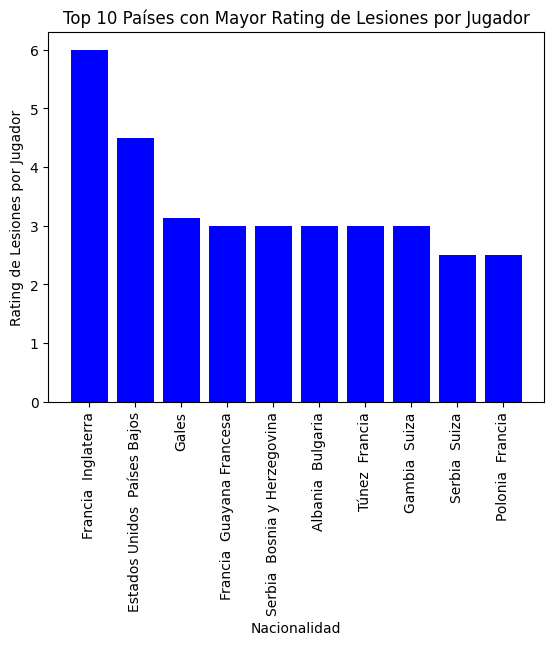

In [48]:
# Contar la cantidad de lesiones por tipo de Nacionalidad
lesiones_por_Nacionalidad = df_LesionesJugadores['Nacionalidad'].value_counts()
categorias = lesiones_por_Nacionalidad.index

# Contar la cantidad de jugadores por tipo de Nacionalidad
jugadores_por_Nacionalidad = df_JugadoresAñoInfo['Nacionalidad'].value_counts()

# Unir índices y llenar valores faltantes con cero
index = lesiones_por_Nacionalidad.index.union(jugadores_por_Nacionalidad.index)
lesiones_por_Nacionalidad = lesiones_por_Nacionalidad.reindex(index, fill_value=0)
jugadores_por_Nacionalidad = jugadores_por_Nacionalidad.reindex(index, fill_value=0)

# Calcular el rating de lesiones por jugador
rating_lesiones_por_jugador = lesiones_por_Nacionalidad / jugadores_por_Nacionalidad

# Ordenar los países por su rating de lesiones por jugador
top_10_paises = rating_lesiones_por_jugador.sort_values(ascending=False).head(10)

# Graficar el histograma
plt.bar(top_10_paises.index, top_10_paises.values, color='blue')
plt.xlabel('Nacionalidad')
plt.ylabel('Rating de Lesiones por Jugador')
plt.title('Top 10 Países con Mayor Rating de Lesiones por Jugador')
plt.xticks(rotation=90)
plt.show()


**Evolucion temporal**

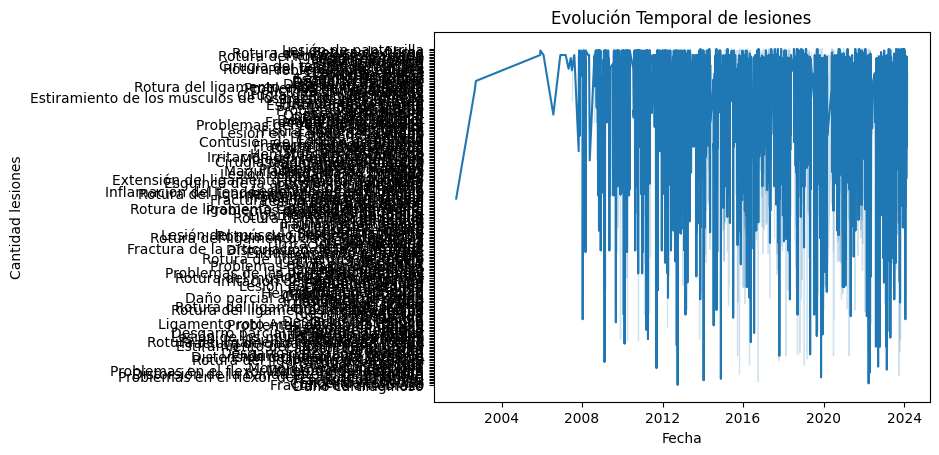

In [49]:
sns.lineplot(x='From', y='Injury', data=df_lesiones)
plt.xlabel('Fecha')
plt.ylabel('Cantidad lesiones')
plt.title('Evolución Temporal de lesiones')
plt.show()

## Analisis estadisticas FIFA

Primero estadistica general.

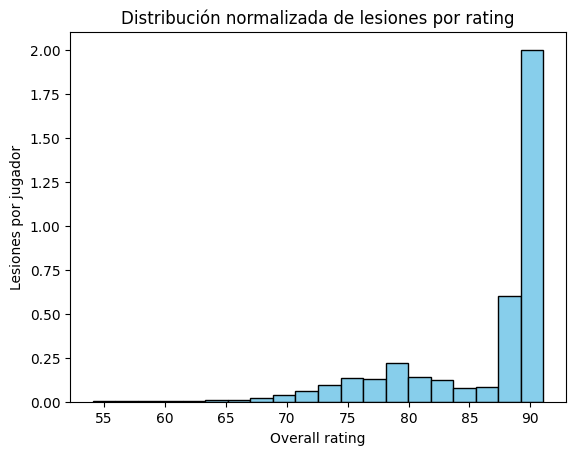

In [50]:
# Calcula el histograma de lesiones y el histograma del rating de jugadores por rating general
hist_lesiones, bins_lesiones = np.histogram(df_lesionesFIFA15['overall'], bins=20)
hist_jugadores, bins_jugadores = np.histogram(df_FIFA15['overall'], bins=bins_lesiones)

# Normaliza el histograma de lesiones dividiendo el número de lesiones en cada grupo de edad por el número de jugadores en ese mismo grupo de rating
hist_lesiones_normalizado = hist_lesiones / hist_jugadores.astype(float)

# Grafica el histograma normalizado
plt.bar(bins_lesiones[:-1], hist_lesiones_normalizado, width=np.diff(bins_lesiones), color='skyblue', edgecolor='black')
plt.xlabel('Overall rating')
plt.ylabel('Lesiones por jugador')
plt.title('Distribución normalizada de lesiones por rating')
plt.show()

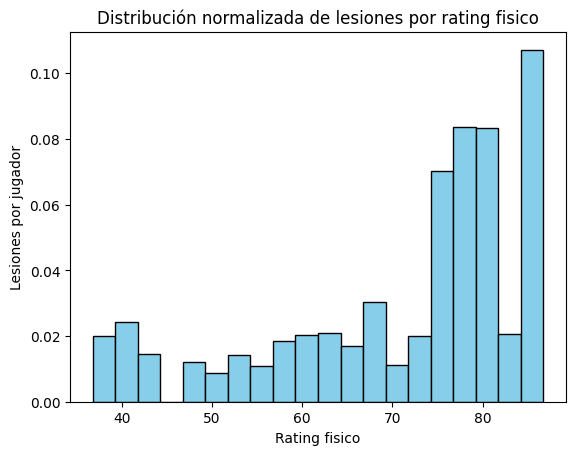

In [51]:
# Calcula el histograma de lesiones y el histograma del rating de jugadores por rating fisico
hist_lesiones, bins_lesiones = np.histogram(df_lesionesFIFA15['physic'], bins=20)
hist_jugadores, bins_jugadores = np.histogram(df_FIFA15['physic'], bins=bins_lesiones)

# Normaliza el histograma de lesiones dividiendo el número de lesiones en cada grupo de edad por el número de jugadores en ese mismo grupo de rating fisico
hist_lesiones_normalizado = hist_lesiones / hist_jugadores.astype(float)

# Grafica el histograma normalizado
plt.bar(bins_lesiones[:-1], hist_lesiones_normalizado, width=np.diff(bins_lesiones), color='skyblue', edgecolor='black')
plt.xlabel('Rating fisico')
plt.ylabel('Lesiones por jugador')
plt.title('Distribución normalizada de lesiones por rating fisico')
plt.show()

## Analisis partidos jugados

In [52]:
# Ordena primero por nombre y luego por fecha
df_partidos_ord = df_partidos.sort_values(by=['Nombre', 'Fecha'], ascending=[True, False])

# Muestra el DataFrame ordenado
print(df_partidos_ord)

       Jornada      Fecha Minutos           Nombre Competicion
404992      38 2022-05-22       0  Aarón Escandell      LaLiga
404991      37 2022-05-15       0  Aarón Escandell      LaLiga
404990      36 2022-05-10       0  Aarón Escandell      LaLiga
404989      35 2022-05-07       0  Aarón Escandell      LaLiga
404988      34 2022-05-01       0  Aarón Escandell      LaLiga
...        ...        ...     ...              ...         ...
293473       5 2019-09-21       0   İsmail Köybaşı      LaLiga
293472       4 2019-09-15       0   İsmail Köybaşı      LaLiga
293471       3 2019-09-01       0   İsmail Köybaşı      LaLiga
187559       2 2019-08-24       0   İsmail Köybaşı   Süper Lig
187558       1 2019-08-19       0   İsmail Köybaşı   Süper Lig

[454125 rows x 5 columns]


In [53]:
valores_unicos_minutos = df_partidos_ord['Minutos'].unique()

# Imprimir los valores
print(valores_unicos_minutos)

[0 "90'" "13'" "120'" "45'" "8'" "62'" "76'" "34'" "81'" "58'" "70'" "30'"
 "24'" "22'" "71'" "67'" "25'" "69'" "74'" "5'" "63'" "73'" "66'" "27'"
 "12'" "55'" "11'" "9'" "20'" "26'" "17'" "77'" "56'" "1'" "87'" "75'"
 "52'" "54'" "29'" "35'" "59'" "18'" "85'" "88'" "82'" "2'" "78'" "51'"
 "16'" "68'" "79'" "72'" "14'" "33'" "19'" "89'" "46'" "64'" "10'" "37'"
 "57'" "65'" "60'" "84'" "80'" "38'" "15'" "86'" "83'" "4'" "23'" "61'"
 "28'" "7'" "32'" "3'" "53'" "31'" "36'" "6'" "21'" "41'" "103'" "43'"
 "40'" "110'" "49'" "113'" "97'" "50'" "39'" "42'" "47'" "96'" "119'"
 "48'" "111'" "112'" "100'" "98'" "109'" "106'" "95'" "115'" "91'" "44'"
 "105'" "116'" "102'" "101'" "108'" "92'" "94'" "107'" "114'" "99'" "104'"
 "93'" "117'" "118'"]


In [54]:
df_partidos_ord.to_excel('df_partidos_ord.xlsx', index=False)

In [55]:
df_partidos_ord['Minutos'] = df_partidos_ord['Minutos'].astype(str)
df_partidos_ord['Minutos'] = df_partidos_ord['Minutos'].str.replace("'", "")
df_partidos_ord['Minutos'] = df_partidos_ord['Minutos'].astype(int)

In [56]:
import pandas as pd

# Definir una función para encontrar la fecha del partido anterior más cercano para cada lesión
def buscar_fecha_anterior(lesion_fecha, jugador_nombre):
    partidos_anteriores = df_partidos_ord[(df_partidos_ord['Nombre'] == jugador_nombre) & (df_partidos_ord['Fecha'] < lesion_fecha)]
    if partidos_anteriores.empty:
        return None
    else:
        return partidos_anteriores['Fecha'].max()

# Aplicar la función para encontrar la fecha del partido anterior más cercano a cada lesión
df_lesiones['Fecha_Previa_Partido'] = df_lesiones.apply(lambda row: buscar_fecha_anterior(row['From'], row['Player']), axis=1)

# Paso 2: Calcular las métricas para los partidos consecutivos
def calcular_minutos_consecutivos(row):
    total_minutos = 0
    partidos = df_partidos_ord[(df_partidos_ord['Nombre'] == row['Player']) & (df_partidos_ord['Fecha'] <= row['Fecha_Previa_Partido'])]
    for _, partido in partidos.iterrows():
        if partido['Minutos'] > 0:
            total_minutos += partido['Minutos']
        else:
            break
    return total_minutos

def calcular_partidos_consecutivos_enteros(row):
    total_partidos = 0
    partidos = df_partidos_ord[(df_partidos_ord['Nombre'] == row['Player']) & (df_partidos_ord['Fecha'] <= row['Fecha_Previa_Partido'])]
    for _, partido in partidos.iterrows():
        if partido['Minutos'] >= 90:
            total_partidos += 1
        else:
            break
    return total_partidos

def calcular_partidos_consecutivos(row):
    total_partidos = 0
    partidos = df_partidos_ord[(df_partidos_ord['Nombre'] == row['Player']) & (df_partidos_ord['Fecha'] <= row['Fecha_Previa_Partido'])]
    for _, partido in partidos.iterrows():
        if partido['Minutos'] > 0:
            total_partidos += 1
        else:
            break
    return total_partidos

# Aplicar las funciones para calcular las métricas
df_lesiones['Minutos_Consecutivos'] = df_lesiones.apply(calcular_minutos_consecutivos, axis=1)
df_lesiones['Partidos_Consecutivos_Enteros'] = df_lesiones.apply(calcular_partidos_consecutivos_enteros, axis=1)
df_lesiones['Partidos_Consecutivos'] = df_lesiones.apply(calcular_partidos_consecutivos, axis=1)

# Muestra el DataFrame resultante con las nuevas columnas
print(df_lesiones)


                            Injury       From         To           Teams  \
0            Lesión de pantorrilla 2015-04-08 2015-05-14  Rayo Vallecano   
1                 Rotura de fibras 2012-01-08 2012-02-05    RCD Espanyol   
2       Rotura del menisco externo 2021-10-30 2021-12-30     Hércules CF   
3               Menisco desgarrado 2021-03-07 2021-08-07     Hércules CF   
4     Rotura del ligamento cruzado 2011-07-17 2012-02-01       Girona FC   
...                            ...        ...        ...             ...   
6404          Problemas musculares 2018-04-02 2018-05-01    RCD Espanyol   
6405  Rotura del ligamento cruzado 2017-03-19 2017-11-09    RCD Espanyol   
6406             Lesión de tobillo 2016-09-26 2016-11-18    RCD Espanyol   
6407               Lesión de muslo 2016-04-18 2016-05-02    RCD Espanyol   
6408           Distensión de muslo 2016-01-11 2016-02-11    RCD Espanyol   

      NumberOfMatches            Player Fecha_Previa_Partido  \
0                   7  

In [57]:
df_lesiones['Injury'].values

array(['Lesión de pantorrilla', 'Rotura de fibras',
       'Rotura del menisco externo', ..., 'Lesión de tobillo',
       'Lesión de muslo', 'Distensión de muslo'], dtype=object)

In [58]:
df_lesiones.to_excel('df_lesiones.xlsx', index=False)

Histograma de frecuencia de lesiones vs media de partidos perdidos por lesion

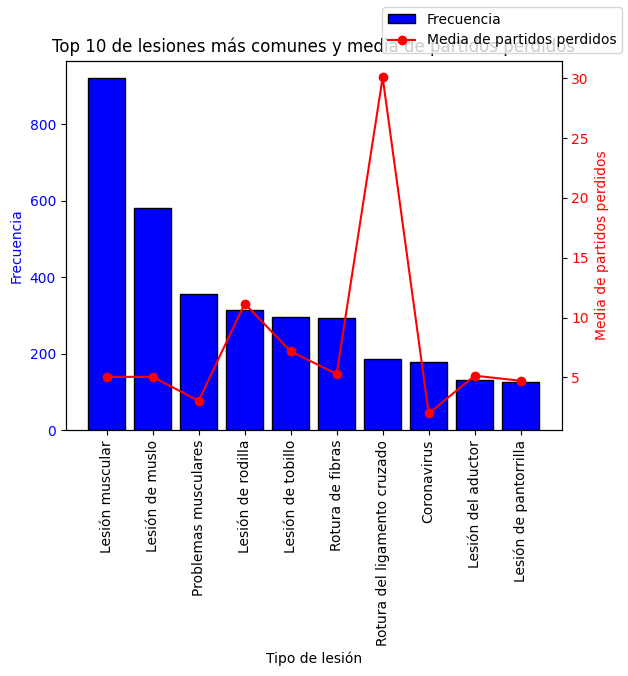

In [59]:
# Calcular la suma de partidos perdidos para cada tipo de lesión
suma_partidos_perdidos = df_lesiones.groupby('Injury')['NumberOfMatches'].sum()

# Calcular la frecuencia de cada tipo lesion
frecuencia_lesiones = df_lesiones['Injury'].value_counts()

#Top 10 lesiones por frecuencia de lesion
top_10_lesiones = frecuencia_lesiones.nlargest(10)

# Graficar el histograma
fig, ax1 = plt.subplots()

# Barras para la frecuencia de lesiones
color = 'blue'
ax1.bar(top_10_lesiones.index, top_10_lesiones.values, color=color, edgecolor='black', label='Frecuencia')

# Configurar el título y las etiquetas de los ejes
ax1.set_xlabel('Tipo de lesión')
ax1.set_ylabel('Frecuencia', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Segundo eje y para la media de partidos perdidos
ax2 = ax1.twinx()

# Calcular la media de partidos perdidos por cada tipo de lesión
media_partidos_perdidos = suma_partidos_perdidos / frecuencia_lesiones
color = 'red'
ax2.plot(top_10_lesiones.index, media_partidos_perdidos[top_10_lesiones.index], color=color, marker='o', label='Media de partidos perdidos')
ax2.set_ylabel('Media de partidos perdidos', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Agregar leyenda
fig.legend(loc='upper right')

# Mostrar el histograma
plt.title('Top 10 de lesiones más comunes y media de partidos perdidos')
plt.show()


Histograma de minutos jugados consecutivos antes de la lesion

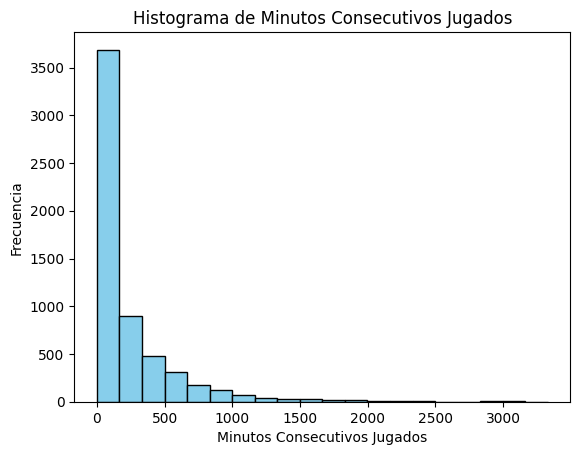

In [60]:
# Calcular el histograma de los minutos jugados consecutivos
plt.hist(df_lesiones['Minutos_Consecutivos'], bins=20, color='skyblue', edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Minutos Consecutivos Jugados')
plt.xlabel('Minutos Consecutivos Jugados')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


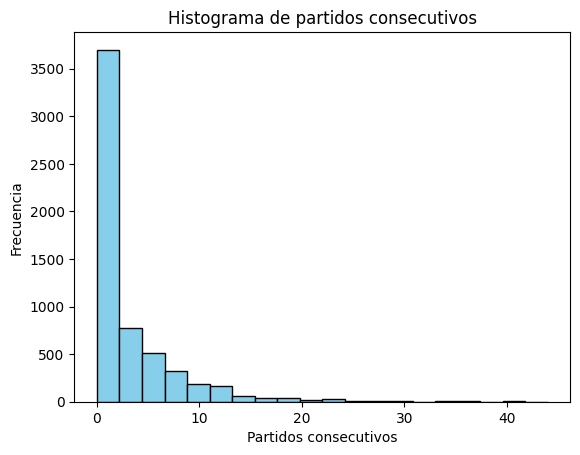

In [61]:
# Supongamos que tienes un DataFrame df_lesiones que contiene la columna 'Partidos_Consecutivos'

# Calcular el histograma de los minutos jugados consecutivos
plt.hist(df_lesiones['Partidos_Consecutivos'], bins=20, color='skyblue', edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de partidos consecutivos')
plt.xlabel('Partidos consecutivos')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


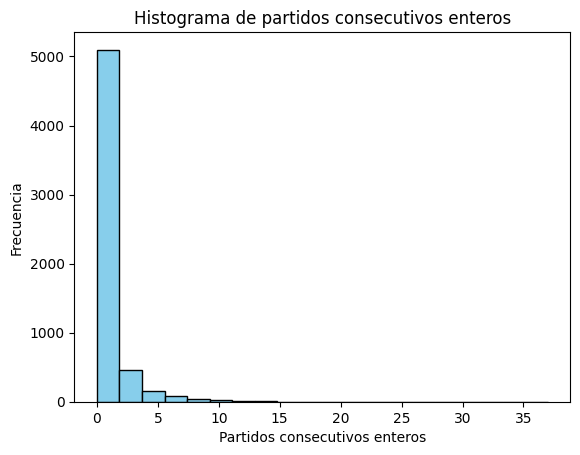

In [62]:
# Supongamos que tienes un DataFrame df_lesiones que contiene la columna 'Partidos Consecutivos Enteros'

# Calcular el histograma de los minutos jugados consecutivos
plt.hist(df_lesiones['Partidos_Consecutivos_Enteros'], bins=20, color='skyblue', edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de partidos consecutivos enteros')
plt.xlabel('Partidos consecutivos enteros')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()